# <center>UNIVERSIDADE ESTADUAL DE CAMPINAS</center>
# <center>INSTITUTE OF COMPUTING</center>

## <center>Machine Learninng</center>
## <center>MC886A/MO444A</center>

- Luis Bernal Chahuayo (RA 234923)
- Jarol Butron Soria (RA 234833)

## K-means
### Load Datasets


In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

df = pd.read_table("cluster.dat",header=None, sep="\s+")
datos = pd.DataFrame(df)
datos


,0,1
0,1555.0,28.65
1,1490.0,27.55
2,1445.0,28.35
3,1415.0,28.80
4,1375.0,28.05
...,...,...
568,3420.0,27.95
569,3465.0,26.85
570,3525.0,26.00
571,3570.0,26.15


- Transforming the dataset to an array


In [2]:
datos=datos.to_numpy()
datos

array([[1555.  ,   28.65],
       [1490.  ,   27.55],
       [1445.  ,   28.35],
       ...,
       [3525.  ,   26.  ],
       [3570.  ,   26.15],
       [3440.  ,   25.6 ]])

### Shuffle data

In [3]:
np.random.shuffle(datos)
datos

array([[2235.  ,    9.2 ],
       [ 735.  ,   18.2 ],
       [1910.  ,    2.65],
       ...,
       [ 335.  ,   23.3 ],
       [1580.  ,   12.6 ],
       [1055.  ,   24.35]])

## Split Dataset 
### Split data in training/test sets (90/10) 

In [4]:
datos_train = datos[:int(0.9*len(datos))]
datos_test = datos[int(0.9*len(datos)):]

x_train = datos_train[:,0]
y_train = datos_train[:,1]

x_test = datos_test[:,0]
y_test = datos_test[:,1]


## Pre-processing
### Normalization

In [5]:
def normalization(x,y,x_max,x_min,y_max,y_min):
    x=(x-x_min)/(x_max-x_min) 
    y=(y-y_min)/(y_max-y_min)
    return x,y

x_max_train = x_train.max()
x_min_train= x_train.min()
y_max_train = y_train.max()
y_min_train = y_train.min()

x_max_test = x_test.max()
x_min_test = x_test.min()
y_max_test = y_test.max()
y_min_test = y_test.min()

x_n_train, y_n_train = normalization(x_train,y_train,x_max_train,x_min_train,y_max_train,y_min_train)
x_n_test, y_n_test = normalization(x_test,y_test,x_max_test,x_min_test,y_max_test,y_min_test)

## Implementation k-means
### Distortion

$$
SSE=\sum_{i=1}^{m} {(y_i - \hat{y_i})}^{2}
$$

In [6]:
def Distortion(x,y,centroides_x,centroides_y):
    distortion = ( ( x - centroides_x )**2 + ( y - centroides_y )**2 ).sum()
    return distortion

In [7]:

def kmeans(k,x,y,x_min,x_max,y_min,y_max):
    # Find min and max values    
    x_min=np.min(x)
    x_max=np.max(x)
    y_min=np.min(y)
    y_max=np.max(y)
   
    # Select K Random Points
    punto_x=np.random.uniform(low=x_min,high=x_max,size=k)
    punto_y=np.random.uniform(low=y_min,high=y_max,size=k)
    
    old_distortion = np.inf 
    for it in range(20):
        # Se creará una matriz de distancias
        matriz_distancias = np.zeros((len(x),k))
    
        for k_i in range(k):
            # Cálculo de Distancia Euclideana
            x_h=(x-punto_x[k_i])**2
            y_h=(y-punto_y[k_i])**2
            dist= np.sqrt(x_h+y_h)
            matriz_distancias[:,k_i]=dist

        # Encontrar la mínima distancia y actualizar la pertenencia en la 
        # matriz máscara
        
        min=np.argmin(matriz_distancias,axis=1)
        matriz_clusters=np.zeros(matriz_distancias.shape)
        i=0
        for min_i in min:
            matriz_clusters[i][min_i]=1
            i+=1
        # Transformar en matriz columna para multiplicar
        x_r=x.reshape(-1,1)
        y_r=y.reshape(-1,1)

        # Calcular la suma de los valores clusters
        matriz_clusters_x=x_r*matriz_clusters
        matriz_clusters_y=y_r*matriz_clusters

        total=matriz_clusters.sum(axis=0)

        total_x=matriz_clusters_x.sum(axis=0)
        total_y=matriz_clusters_y.sum(axis=0)

        # Actualizar puntos con la media total_x
        punto_x=(total_x/ (total+0.0000000001) )
        punto_y=(total_y/ (total+0.0000000001) )

        # Lista de clusters ( 0, 1 , 2) Para colorear
        clusters = np.argmax(matriz_clusters,axis=1)
        
        centroides_x = np.matmul(matriz_clusters,punto_x)
        centroides_y = np.matmul(matriz_clusters,punto_y)
        
        distortion = Distortion(x,y,centroides_x,centroides_y)
        
        # Distortion No varía
        if ( abs( old_distortion - distortion ) <= 0.001 ): break
        else: old_distortion = distortion



    
    print ( "\n \n DISTORTION =",distortion, "ITERATION=", it)
    plt.scatter(x,y,marker="o",c=clusters)
    plt.scatter(punto_x,punto_y,marker="*",c="red")
    plt.show()

    return punto_x,punto_y,matriz_clusters,distortion


## Metrics to evaluate
### Root mean squared error standard deviation (RMSSTD)

$$
RMSSTD= \sqrt{\frac{{\sum_i}{\sum_{x{\in}c_i}}{{\parallel x-c_i\parallel}}^{2}}{p.{\sum_i (n_i - 1)}}}
$$


In [8]:
def RMSSTD(x,y,punto_x,punto_y,matriz_clusters,k):
    centroides_x = np.matmul(matriz_clusters,punto_x)
    centroides_y = np.matmul(matriz_clusters,punto_y)
    distortion = Distortion(x,y,centroides_x,centroides_y)
    number_attributes = 2 * ( len(x) - k )
    return np.sqrt(distortion/number_attributes)




 
 DISTORTION = 86.3060275474182 ITERATION= 1


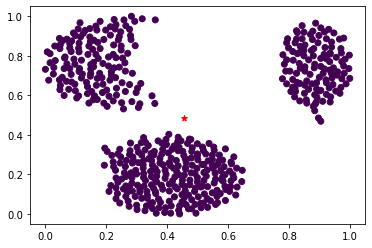


 
 DISTORTION = 46.894057947185686 ITERATION= 5


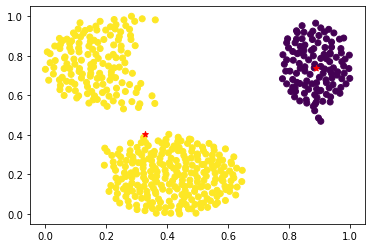


 
 DISTORTION = 11.14670770969255 ITERATION= 3


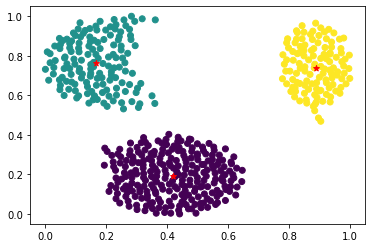


 
 DISTORTION = 9.457961166514146 ITERATION= 14


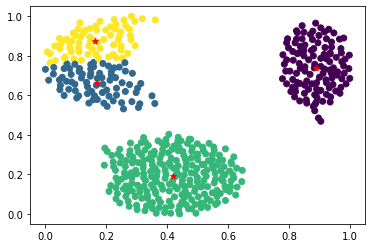


 
 DISTORTION = 8.900904766558963 ITERATION= 15


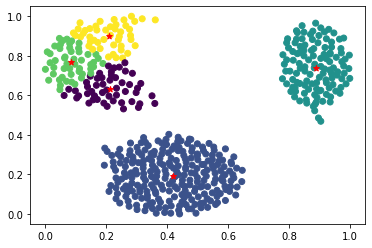


 
 DISTORTION = 9.758655999526193 ITERATION= 10


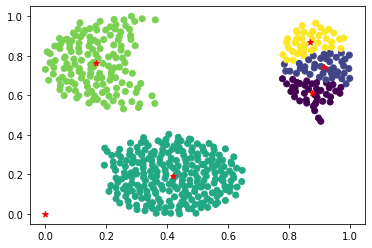


 
 DISTORTION = 5.425089287261334 ITERATION= 9


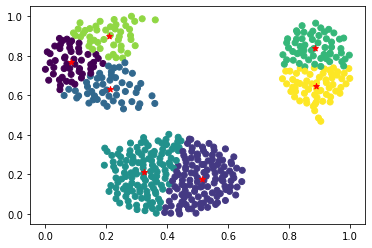


 
 DISTORTION = 5.2851246128766745 ITERATION= 10


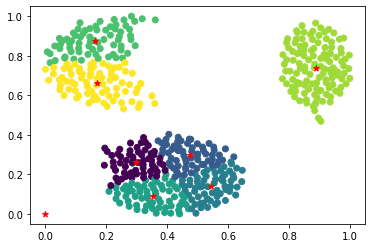


 
 DISTORTION = 4.567274162286182 ITERATION= 14


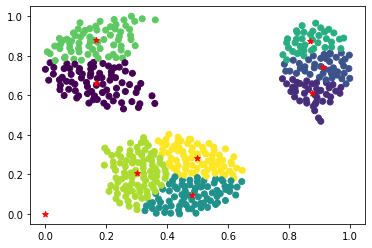


 
 DISTORTION = 4.430586037822245 ITERATION= 9


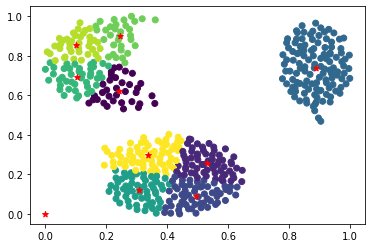

Disttortion


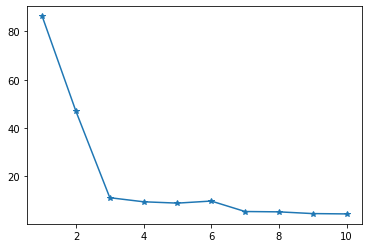

Root Mean Squared Standard Deviation


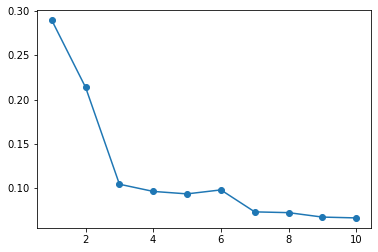

In [9]:
def metodo_codo(k_max):
    list_distortions = []
    list_rmmstds = []
    for k in range(1,k_max+1):
        centroide_x , centroide_y , matriz_clusters , distortion = kmeans(k,x_n_train,y_n_train,x_min_train,x_max_train,y_min_train,y_max_train)
        rmmstd = RMSSTD(x_n_train,y_n_train,centroide_x,centroide_y, matriz_clusters, k)
        list_distortions.append(distortion)
        list_rmmstds.append(rmmstd)
    
    print("Disttortion")
    plt.plot(range(1,k_max+1),list_distortions,marker="*")
    plt.show()

    print("Root Mean Squared Standard Deviation")
    plt.plot(range(1,k_max+1),list_rmmstds,marker="o")
    plt.show()



metodo_codo(10)